# Multicore Geochemical Data - MUDBENCS
## Downcore and Spatial Analyses

This notebook analyzes the spatial trends in core top, core catcher, and downcore data, and compares downcore trends within and between multicores. All multicores were extruded aboard the *R/V F.G. Walton Smith* at 2.5 cm resolution to screen the cores for lithological and geochemical changes. At least one archived core for each of these cores is in the Marine Geological Core Repository at Oregon State University. 

In [1]:
#Import packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import MUDBENCS_calcs as MB

(((((((((((((((( MUDBENCS Date Analysis and Visualization Tools ))))))))))))))))


In [2]:
#Load organic geochemistry dataframe as og_df

og_df = MB.load_organic_geochem_MC()
print(og_df.head())

Dataframe formed from merger of two spreadsheets. Pandas merge function creates a column "_merge"
 that tells you left, right, or both. This is an important column to check. The "left" dataframe
 contains carbon run analyses, and the right one contains nitrogen run analyses. Verify that 
 any rows with either left or right in the _merge column are unique to either the C or N dataframe.
                   Sample ID      d15N     N%(N)     C%(N)  umols N (N)  \
0  WS23-139-11MC-3 37.5-40cm  5.028679  0.117491  0.810322     3.099800   
1  WS23-139-10MC-3 37.5-40cm  5.262847  0.112266  0.799235     2.735170   
2  WS23-139-10MC-3 45-47.5cm  4.576080  0.111545  0.779182     2.765698   
3  WS23-139-10MC-3 42.5-45cm  4.417421  0.111712  0.774355     2.622093   
4  WS23-139-11MC-3 5.0-7.5cm  5.172629  0.126060  0.822524     2.955788   

   d15N (C)       d13C        N%        C%  C:N (mass)   umols N    umols C  \
0  5.226818 -24.128121  0.115509  0.660866    6.264558  1.368048   9.997399   
1 

## Downcore and pseudospatial analysis
Here we look at downcore trends within certain spatial groups of samples.

<AxesSubplot:xlabel='$\\delta^{15}$N', ylabel='Depth (cm)'>

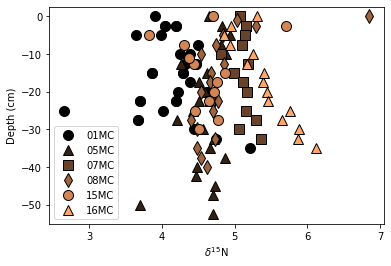

In [16]:
#Plot multiple cores, one variable:
#Select a variable (must be a column from the og_df)
variable = 'd15N'

#Choose from these corelists, or make another one of your choosing:
inner_MCs = ['04MC', '06MC', '10MC', '11MC', '17MC']
outer_MCs = ['01MC', '05MC', '07MC', '08MC', '15MC', '16MC']


MB.plot_MCs(og_df, corelist=outer_MCs, variable=variable, cmap='copper')

## Plotting multiple results by core
The above plots dealing with analytics and with pseudo-spatial core relationships with one variable don't allow the simple view of multiple variables in individual cores. The code below does that and allows a loop to be constructed to construct the same figures with multiple cores.

[Text(0.5, 0, '%TOC')]

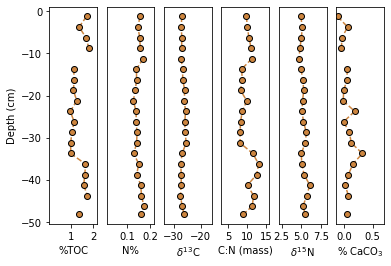

In [17]:
core = '17MC'
variables = ['C%', 'N%', 'd13C', 'C:N (mass)', 'd15N', '%CaCO3']
MC_axs = MB.MC_core_profiles(og_df, core, variables)
MC_axs[0].set(xlabel='%TOC')

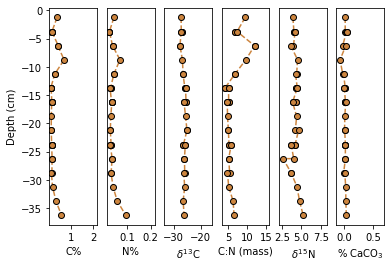

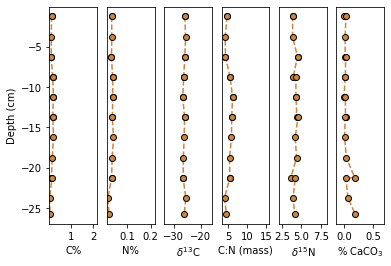

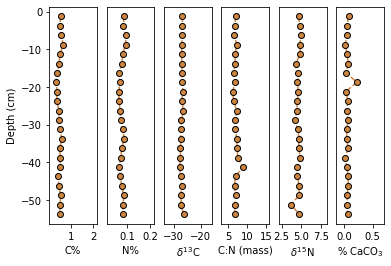

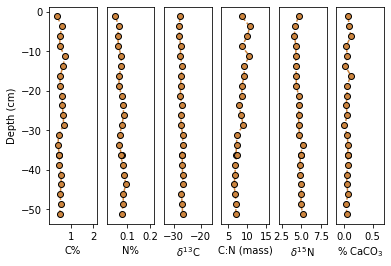

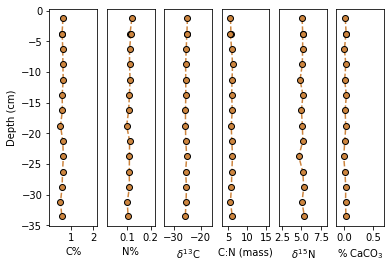

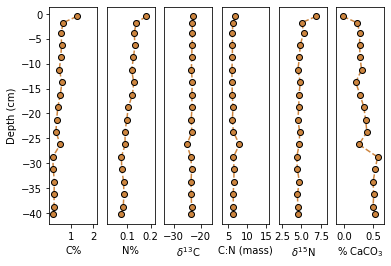

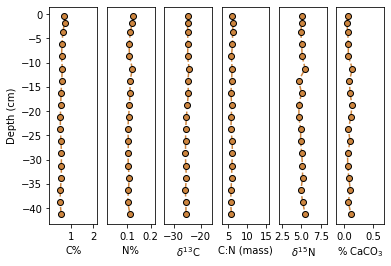

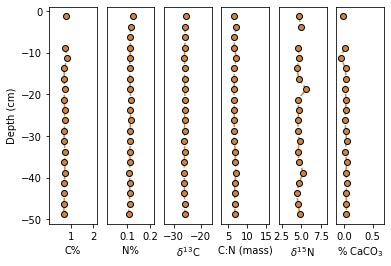

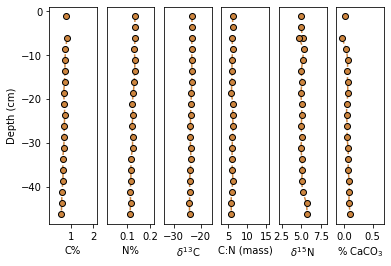

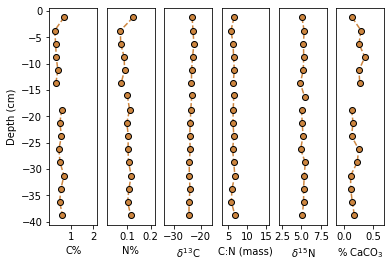

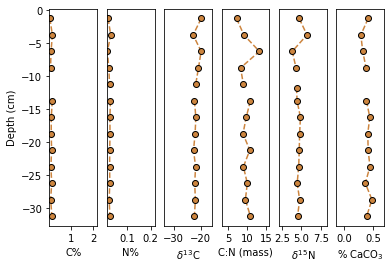

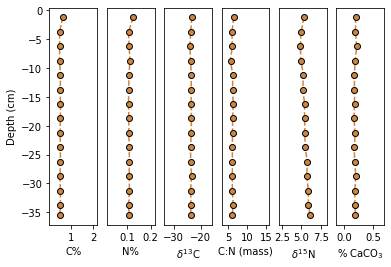

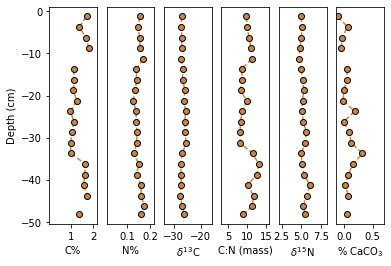

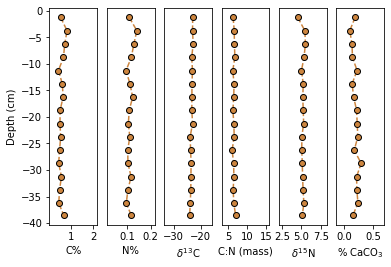

In [20]:
#Construct a loop to process all of the cores with the same figure:
corelist = ['01MC', '04MC', '05MC', '06MC', '07MC', '08MC', '09MC', '10MC', '11MC', '12MC', '15MC','16MC', '17MC', '18MC']
variables = ['C%', 'N%', 'd13C', 'C:N (mass)', 'd15N', '%CaCO3']


for core in corelist:
    directory = 'C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Seagoing Expeditions/CHEM-OCE Guianas Mudbanks 2020/Expedition prep/MUDBENCS/Coring Data'
    filename = 'WS23-139_' + core + '_GenGeoChem'
    ax = MB.MC_core_profiles(og_df, core=core, variables=variables)
    #To save, rename the directory above and uncomment the line below:
    
    #plt.savefig(directory + '/' + filename+'.svg', dpi=300)


## Investigating the % Carbonate in the samples
### Comparison of the %C in acid-treated versus non-acid-treated runs
The following plots analyze the amount of carbonate in the samples as inferred by the difference in %C of the nitrogen runs (not acid treated) and the carbon runs (acid treated). 

[Text(0.5, 0, 'C:N (mass)'),
 Text(0, 0.5, '%C - %TOC \n (% carbonate estimate)')]

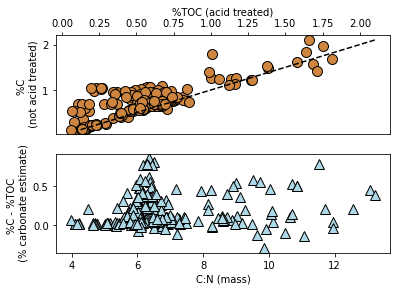

In [7]:
#Investigate the amount of inorganic carbon through comparison of the carbon and nitrogen EA runs
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot(og_df['C%'], og_df['C%(N)'], marker='o', mec='k', mfc='peru', linestyle='', markersize=10)
#add 1:1 line:
one_to_one = np.linspace(min(og_df['C%(N)']), max(og_df['C%(N)']), 10)
ax[0].plot(one_to_one, one_to_one, linestyle='--', color='k')
ax[0].set(xlabel='%TOC (acid treated)', ylabel='%C \n (not acid treated)')
ax[0].xaxis.set_label_position('top')
ax[0].xaxis.tick_top()

x_column = 'C:N (mass)'
ax[1].plot(og_df[x_column], og_df['C%(N)']-og_df['C%'], marker='^', markersize=10, mec='k', mfc='lightblue', linestyle='')
ax[1].set(xlabel=x_column, ylabel='%C - %TOC \n (% carbonate estimate)')

[Text(0.5, 0, '% CaCO$_3$, calculated'), Text(0, 0.5, '# of observations')]

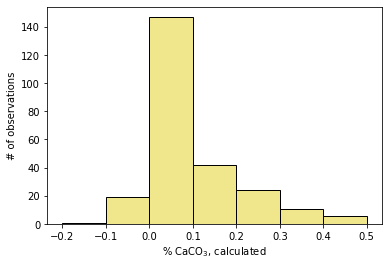

In [8]:
#Plot histogram of %carbonate
fig, ax = plt.subplots(1,1)
bins = [-0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]
ax.hist(og_df['%CaCO3'], color='khaki', edgecolor='k', bins=bins)
ax.set(xlabel=r'% CaCO$_3$, calculated', ylabel='# of observations')

## Analytical Investigation - QC and Curiosity
Now that all of the data are in a workable format, there are some data analysis plots to convey. First we look at how much nitrogen was lost or gained from acid treating the samples to remove carbonate minerals. We use the differences between %N in the nitrogen runs (not acid treated) and the carbon runs (acid treated to remove carbonates). 

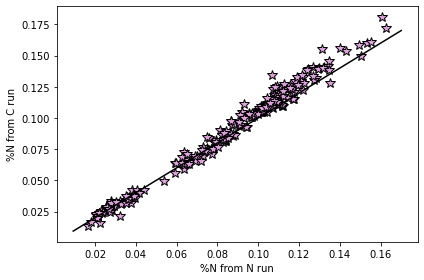

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(og_df['N%(N)'], og_df['N%'], marker='*', color='plum', linestyle='', markeredgecolor='k', markersize=10)
xes = ax.get_xlim()
x = np.linspace(min(xes), max(xes), 10)
y = x
ax.plot(x, y, color='k')
ax.set_xlabel('%N from N run')
ax.set_ylabel('%N from C run')
plt.tight_layout()
#plt.savefig('C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Seagoing Expeditions/CHEM-OCE Guianas Mudbanks 2020/Expedition prep/MUDBENCS/Coring Data/percentN_scatter.svg', dpi=300)

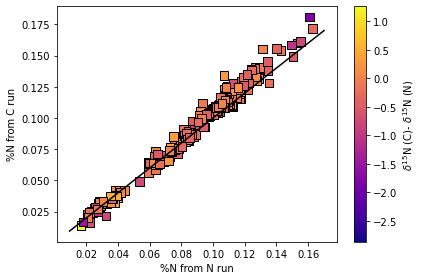

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1)
scatterplot = ax.scatter(og_df['N%(N)'], og_df['N%'], c=og_df['d15N (C)']-og_df['d15N'], marker='s',  linestyle='None', edgecolor='k', s=75, cmap='plasma')
cbar = plt.colorbar(scatterplot, label=r'$\delta^{15}$N (C)- $\delta^{15}$N (N)')
xes = ax.get_xlim()
x = np.linspace(min(xes), max(xes), 10)
y = x
ax.plot(x, y, color='k')
ax.set_xlabel('%N from N run')
ax.set_ylabel('%N from C run')

plt.tight_layout()
#plt.savefig('C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Seagoing Expeditions/CHEM-OCE Guianas Mudbanks 2020/Expedition prep/MUDBENCS/Coring Data/percentN_scatter_isotope_diffs.svg', dpi=300)

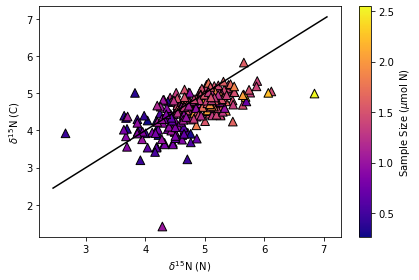

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1)
scatterplot = ax.scatter(og_df['d15N'], og_df['d15N (C)'], c=og_df['umols N'], marker='^',  linestyle='None', edgecolor='k', s=75, cmap='plasma')
cbar = plt.colorbar(scatterplot, label=r'Sample Size ($\mu$mol N)')
xes = ax.get_xlim()
x = np.linspace(min(xes), max(xes), 10)
y = x
ax.plot(x, y, color='k')
ax.set_xlabel(r'$\delta^{15}$N (N)')
ax.set_ylabel(r'$\delta^{15}$N (C)')

plt.tight_layout()
#plt.savefig('C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Seagoing Expeditions/CHEM-OCE Guianas Mudbanks 2020/Expedition prep/MUDBENCS/Coring Data/Nisotope_scatter_mass.svg', dpi=300)

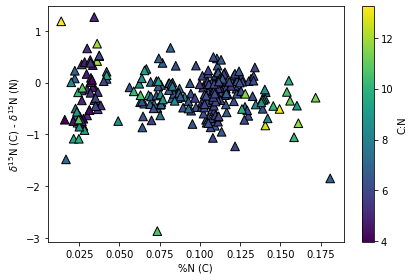

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1)
scatterplot = ax.scatter(og_df['N%'], og_df['d15N (C)'] - og_df['d15N'], c=og_df['C:N (mass)'], marker='^',  linestyle='None', edgecolor='k', s=75, cmap='viridis')
cbar = plt.colorbar(scatterplot, label=r'C:N')
xes = ax.get_xlim()
x = np.linspace(min(xes), max(xes), 10)
y = x
#ax.plot(x, y, color='k')
ax.set_xlabel(r'%N (C)')
ax.set_ylabel(r'$\delta^{15}$N (C) - $\delta^{15}$N (N)')

plt.tight_layout()
#plt.savefig('C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Seagoing Expeditions/CHEM-OCE Guianas Mudbanks 2020/Expedition prep/MUDBENCS/Coring Data/NIsotopeDiff_percentN_CN.svg', dpi=300)